In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
# Specify the path to your dataset folder
dataset_path = '/content/drive/MyDrive/labelled_images'

In [ ]:
import os
os.listdir('/content/drive/MyDrive/labelled_images')

['Polyp',
 'Foreign body',
 'Reduced mucosal view',
 'Erythema',
 'Erosion',
 'Lymphangiectasia',
 'Normal clean mucosa',
 'Ulcer',
 'Ileocecal valve',
 'Pylorus',
 'Ampulla of vater',
 'Blood - fresh',
 'Blood - hematin',
 'Angiectasia']

In [ ]:
# Define the main path to the dataset
dataset_path = '/content/drive/MyDrive/labelled_images'

# Create a list of folder names for all 14 classes (excluding 'Normal clean mucosa')
class_folders = ['Polyp',
 'Foreign body',
 'Reduced mucosal view',
 'Erythema',
 'Erosion',
 'Lymphangiectasia',
 'Normal clean mucosa',
 'Ulcer',
 'Ileocecal valve',
 'Pylorus',
 'Ampulla of vater',
 'Blood - fresh',
 'Blood - hematin',
 'Angiectasia']

In [ ]:
import os
# Specify the base folder where your images are located
base_folder = '/content/drive/MyDrive/labelled_images'

# List the subfolders (your  class folders)
class_folders = os.listdir(base_folder)

# Specify the new base name
new_base_name = 'image'

# Loop through each class folder
for class_folder in class_folders:
    folder_path = os.path.join(base_folder, class_folder)
    files = os.listdir(folder_path)

    # Rename each file in the folder
    for i, file_name in enumerate(files):
        old_path = os.path.join(folder_path, file_name)
        new_name = f"{new_base_name}_{i}.jpg"  # Change the extension if needed
        new_path = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_path, new_path)

    print(f"Renaming completed for class folder: {class_folder}")

Renaming completed for class folder: Polyp
Renaming completed for class folder: Foreign body
Renaming completed for class folder: Reduced mucosal view
Renaming completed for class folder: Erythema
Renaming completed for class folder: Erosion
Renaming completed for class folder: Lymphangiectasia
Renaming completed for class folder: Normal clean mucosa
Renaming completed for class folder: Ulcer
Renaming completed for class folder: Ileocecal valve
Renaming completed for class folder: Pylorus
Renaming completed for class folder: Ampulla of vater
Renaming completed for class folder: Blood - fresh
Renaming completed for class folder: Blood - hematin
Renaming completed for class folder: Angiectasia


In [ ]:
# Add this code before trying to access the class folder
class_folders = ['Polyp',
 'Foreign body',
 'Reduced mucosal view',
 'Erythema',
 'Erosion',
 'Lymphangiectasia',
 'Normal clean mucosa',
 'Ulcer',
 'Ileocecal valve',
 'Pylorus',
 'Ampulla of vater',
 'Blood - fresh',
 'Blood - hematin',
 'Angiectasia']


for class_folder in class_folders:
    class_folder_path = os.path.join(dataset_path, class_folder)
    if not os.path.exists(class_folder_path):
        print(f"Class folder not found: {class_folder_path}")

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import os  # Import the os module
import cv2  # Import the cv2 module
import numpy as np

# Define the path to your dataset on Google Drive
drive_path = '/content/drive/MyDrive/labelled_images'

# Define the class names you provided
class_names = ['Polyp',
 'Foreign body',
 'Reduced mucosal view',
 'Erythema',
 'Erosion',
 'Lymphangiectasia',
 'Normal clean mucosa',
 'Ulcer',
 'Ileocecal valve',
 'Pylorus',
 'Ampulla of vater',
 'Blood - fresh',
 'Blood - hematin',
 'Angiectasia']

# Initialize empty lists to store features and labels
X_resampled = []
y_resampled = []

# Loop through each class folder and load images
for class_folder in class_names:
    class_path = os.path.join(drive_path, class_folder)
    images = []

    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)

        # Check if the file exists before trying to load and resize it
        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            # Check if the image loaded successfully
            if image is not None:
                image = cv2.resize(image, (128, 128))
                images.append(image)
            else:
                print(f"Unable to load image: {image_path}")
        else:
            print(f"File not found: {image_path}")

    # Convert class images to a numpy array
    images = np.array(images)

    # Reshape images to be flat feature vectors
    images = images.reshape(images.shape[0], -1)

    X_resampled.append(images)
    y_resampled.append([class_names.index(class_folder)] * len(images))

# Concatenate all classes' data
X_resampled = np.concatenate(X_resampled)
y_resampled = np.concatenate(y_resampled)

# Apply SMOTE to balance the entire dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Shuffle the resampled dataset
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Verify the balanced dataset
unique, counts = np.unique(y_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Balanced Class Distribution:")
for class_label, count in class_counts.items():
    print(f"Class {class_label} ({class_names[class_label]}): {count} samples")

Balanced Class Distribution:
Class 0 (Polyp): 1000 samples
Class 1 (Foreign body): 1000 samples
Class 2 (Reduced mucosal view): 1000 samples
Class 3 (Erythema): 1000 samples
Class 4 (Erosion): 1000 samples
Class 5 (Lymphangiectasia): 1000 samples
Class 6 (Normal clean mucosa): 1000 samples
Class 7 (Ulcer): 1000 samples
Class 8 (Ileocecal valve): 1000 samples
Class 9 (Pylorus): 1000 samples
Class 10 (Ampulla of vater): 1000 samples
Class 11 (Blood - fresh): 1000 samples
Class 12 (Blood - hematin): 1000 samples
Class 13 (Angiectasia): 1000 samples


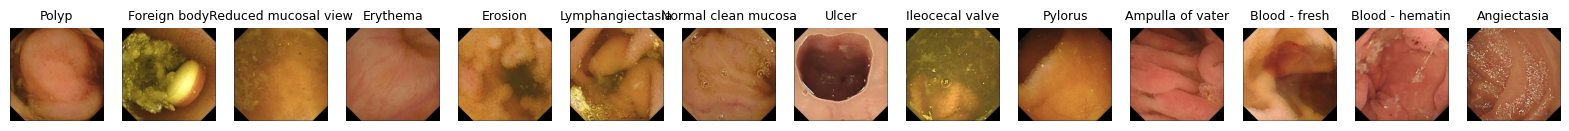

In [ ]:
import matplotlib.pyplot as plt
def display_sample_images(dataset_path, class_names, title_fontsize=12):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, len(class_names), figsize=(20, 10))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        sample_image = cv2.imread(os.path.join(class_path, os.listdir(class_path)[0]))

        axs[i].imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
        axs[i].set_title(class_name, fontsize=title_fontsize)
        axs[i].axis('off')

    plt.show()

# Call the function and specify the title font size (change as needed)
display_sample_images(dataset_path, class_names, title_fontsize=9)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
# Apply SMOTE to balance the entire dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Shuffle the resampled dataset
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [ ]:
# Verify the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (11200, 49152)
Testing data shape: (2800, 49152)


In [ ]:
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical

#  y_train and y_test are your label arrays
y_train_one_hot = to_categorical(y_train, num_classes=len(class_names))
y_test_one_hot = to_categorical(y_test, num_classes=len(class_names))

In [ ]:
# Verify the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (11200, 128, 128, 3)
Testing data shape: (2800, 128, 128, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.initializers import GlorotUniform

# Define the model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 3), kernel_initializer=GlorotUniform(), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=GlorotUniform(), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=GlorotUniform(), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=GlorotUniform(), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense Layers
model.add(Dense(512, kernel_initializer=GlorotUniform(), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, kernel_initializer=GlorotUniform(), activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(class_names), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 32, 32, 64)       

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/10
350/350 [==============================] - 12s 34ms/step - loss: 2.0845 - accuracy: 0.2929 - val_loss: 1.7702 - val_accuracy: 0.4307
Epoch 2/10
350/350 [==============================] - 11s 31ms/step - loss: 1.8169 - accuracy: 0.4031 - val_loss: 1.6204 - val_accuracy: 0.4914
Epoch 3/10
350/350 [==============================] - 10s 29ms/step - loss: 1.6043 - accuracy: 0.4815 - val_loss: 1.3043 - val_accuracy: 0.5889
Epoch 4/10
350/350 [==============================] - 10s 28ms/step - loss: 1.3928 - accuracy: 0.5554 - val_loss: 1.1492 - val_accuracy: 0.6543
Epoch 5/10
350/350 [==============================] - 10s 28ms/step - loss: 1.2493 - accuracy: 0.6019 - val_loss: 1.0261 - val_accuracy: 0.7071
Epoch 6/10
350/350 [==============================] - 10s 28ms/step - loss: 1.1400 - accuracy: 0.6354 - val_loss: 0.9383 - val_accuracy: 0.7339
Epoch 7/10
350/350 [==============================] - 10s 28ms/step - loss: 1.0358 - accuracy: 0.6702 - val_loss: 0.9243 - val_accuracy:

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/30
350/350 [==============================] - 10s 29ms/step - loss: 0.7916 - accuracy: 0.7511 - val_loss: 0.6986 - val_accuracy: 0.8189
Epoch 2/30
350/350 [==============================] - 10s 28ms/step - loss: 0.7649 - accuracy: 0.7642 - val_loss: 0.6104 - val_accuracy: 0.8336
Epoch 3/30
350/350 [==============================] - 10s 28ms/step - loss: 0.7192 - accuracy: 0.7777 - val_loss: 0.6010 - val_accuracy: 0.8450
Epoch 4/30
350/350 [==============================] - 13s 38ms/step - loss: 0.6882 - accuracy: 0.7873 - val_loss: 0.6771 - val_accuracy: 0.8196
Epoch 5/30
350/350 [==============================] - 12s 35ms/step - loss: 0.7034 - accuracy: 0.7859 - val_loss: 0.7045 - val_accuracy: 0.8339
Epoch 6/30
350/350 [==============================] - 11s 31ms/step - loss: 0.6005 - accuracy: 0.8129 - val_loss: 0.5613 - val_accuracy: 0.8507
Epoch 7/30
350/350 [==============================] - 10s 29ms/step - loss: 0.5959 - accuracy: 0.8177 - val_loss: 0.5793 - val_accuracy:

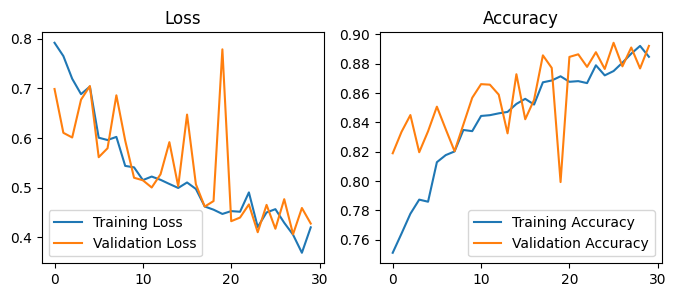

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [ ]:
# Access the loss function from the compiled model
loss_function = model.loss

# Print the loss function
print(f"Loss Function: {loss_function}")

Loss Function: sparse_categorical_crossentropy


In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, np.argmax(y_pred, axis=1), target_names=class_names))



88/88 [==============================] - 1s 6ms/step
Classification Report:
                      precision    recall  f1-score   support

               Polyp       0.99      1.00      0.99       200
        Foreign body       0.94      0.74      0.83       200
Reduced mucosal view       0.92      0.98      0.95       200
            Erythema       0.91      0.89      0.90       200
             Erosion       0.80      0.77      0.78       200
    Lymphangiectasia       0.89      0.77      0.82       200
 Normal clean mucosa       0.80      0.81      0.81       200
               Ulcer       0.91      0.91      0.91       200
     Ileocecal valve       0.89      0.96      0.93       200
             Pylorus       0.69      0.89      0.77       200
    Ampulla of vater       0.96      1.00      0.98       200
       Blood - fresh       0.94      0.92      0.93       200
     Blood - hematin       0.98      1.00      0.99       200
         Angiectasia       0.93      0.86      0.90    

88/88 [==============================] - 1s 6ms/step


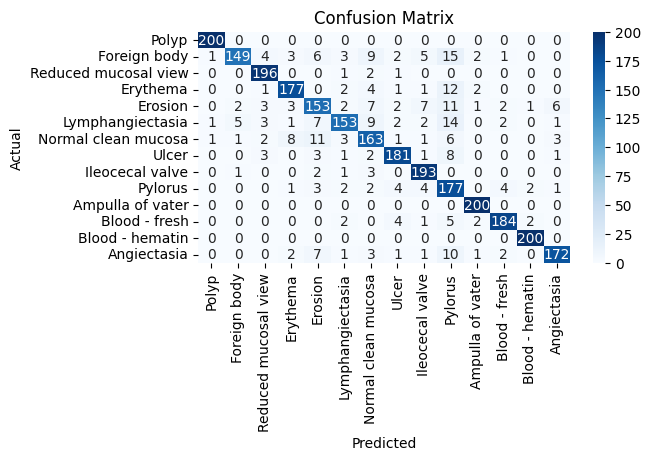

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

# Convert probability predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


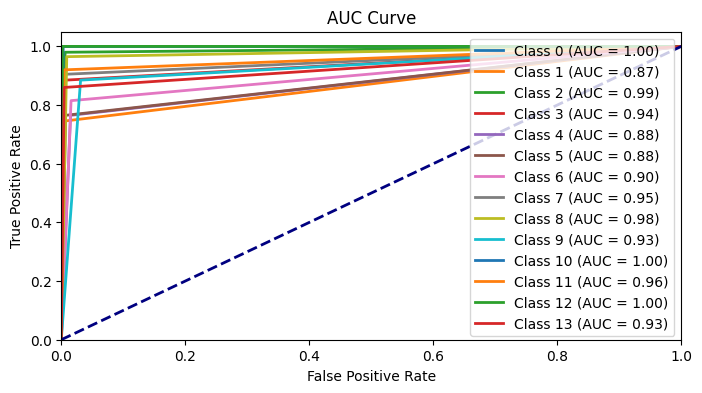

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
n_classes = len(class_names)
y_test_one_hot = label_binarize(y_test, classes=list(range(n_classes)))
y_pred_one_hot = label_binarize(y_pred_labels, classes=list(range(n_classes)))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc='best')
plt.show()

88/88 [==============================] - 1s 6ms/step


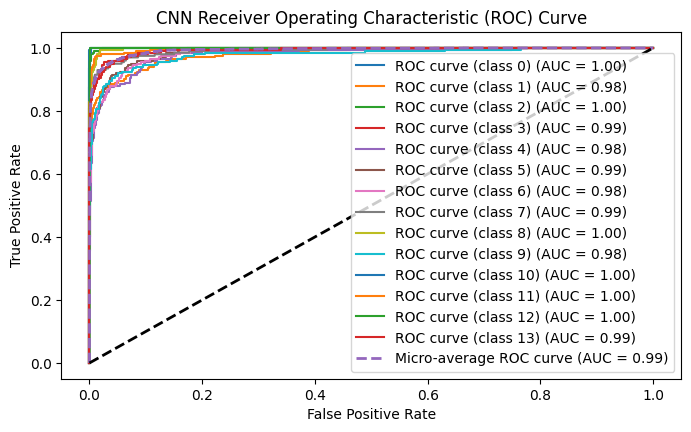

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
y_pred_prob_bin = y_pred_prob  # assuming model output is already probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 4.5))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:


# Train the model
batch_size = 64
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


Epoch 1/30
140/140 [==============================] - 10s 54ms/step - loss: 7.7790 - accuracy: 0.0729 - val_loss: 2.6337 - val_accuracy: 0.0812
Epoch 2/30
140/140 [==============================] - 8s 60ms/step - loss: 2.6058 - accuracy: 0.0931 - val_loss: 2.5591 - val_accuracy: 0.1442
Epoch 3/30
140/140 [==============================] - 8s 56ms/step - loss: 2.5570 - accuracy: 0.1194 - val_loss: 2.4970 - val_accuracy: 0.1518
Epoch 4/30
140/140 [==============================] - 7s 53ms/step - loss: 2.4438 - accuracy: 0.1546 - val_loss: 2.3146 - val_accuracy: 0.2125
Epoch 5/30
140/140 [==============================] - 7s 50ms/step - loss: 2.3340 - accuracy: 0.1836 - val_loss: 2.1715 - val_accuracy: 0.3009
Epoch 6/30
140/140 [==============================] - 7s 52ms/step - loss: 2.0829 - accuracy: 0.2871 - val_loss: 2.0046 - val_accuracy: 0.3469
Epoch 7/30
140/140 [==============================] - 7s 50ms/step - loss: 1.8827 - accuracy: 0.3701 - val_loss: 1.8214 - val_accuracy: 0.393

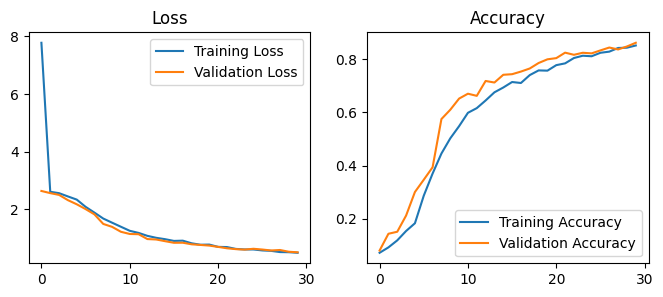

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, np.argmax(y_pred, axis=1), target_names=class_names))

88/88 [==============================] - 1s 6ms/step
Classification Report:
                      precision    recall  f1-score   support

               Polyp       0.94      1.00      0.97       200
        Foreign body       0.96      0.75      0.84       200
Reduced mucosal view       0.93      0.98      0.95       200
            Erythema       0.79      0.86      0.82       200
             Erosion       0.69      0.77      0.73       200
    Lymphangiectasia       0.88      0.81      0.84       200
 Normal clean mucosa       0.71      0.76      0.73       200
               Ulcer       0.93      0.85      0.89       200
     Ileocecal valve       0.94      0.86      0.90       200
             Pylorus       0.70      0.83      0.76       200
    Ampulla of vater       0.95      1.00      0.98       200
       Blood - fresh       0.93      0.90      0.92       200
     Blood - hematin       1.00      1.00      1.00       200
         Angiectasia       0.92      0.80      0.85    

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert one-hot encoded labels to class labels
from tensorflow.keras.utils import to_categorical

#  y_train and y_test are your label arrays
y_train_one_hot = to_categorical(y_train, num_classes=len(class_names))
y_test_one_hot = to_categorical(y_test, num_classes=len(class_names))

# Convert probability predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f"Precision (Weighted): {precision:.4f}")

# Calculate recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print(f"Recall (Weighted): {recall:.4f}")

Accuracy: 0.8686
Precision (Weighted): 0.8756
Recall (Weighted): 0.8686


88/88 [==============================] - 1s 6ms/step


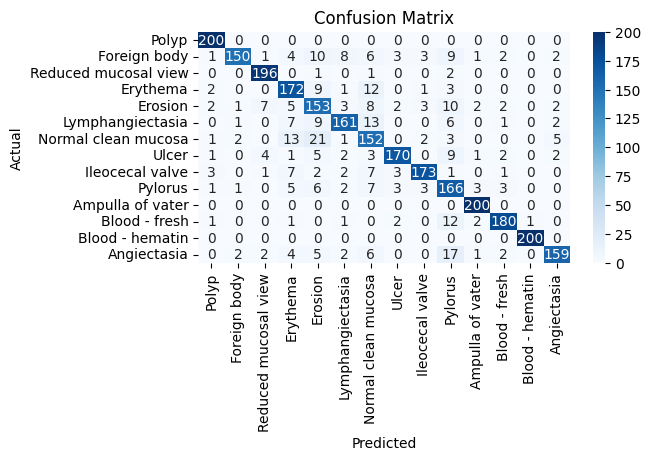

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

# Convert probability predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

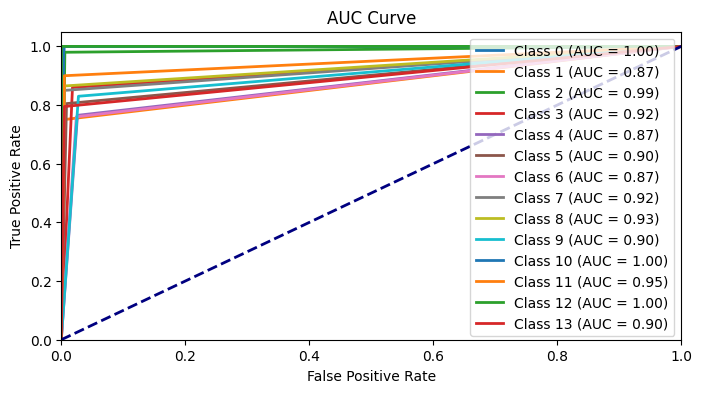

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
n_classes = len(class_names)
y_test_one_hot = label_binarize(y_test, classes=list(range(n_classes)))
y_pred_one_hot = label_binarize(y_pred_labels, classes=list(range(n_classes)))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc='best')
plt.show()

88/88 [==============================] - 1s 7ms/step


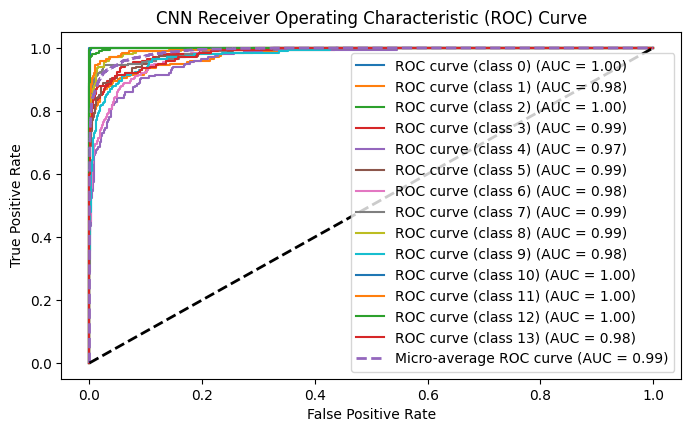

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
y_pred_prob_bin = y_pred_prob  # assuming model output is already probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 4.5))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load ResNet50 pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a sequential model
model = Sequential()

# Add the ResNet50 base model
model.add(base_model)

# Flatten the output of ResNet50
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(class_names), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
batch_size = 64
epochs = 30

# Assuming X_train and y_train are your training data and labels
# Assuming X_test and y_test are your test data and labels
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                       

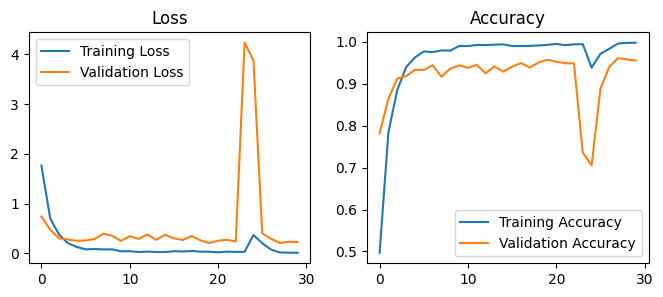

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, np.argmax(y_pred, axis=1), target_names=class_names))

88/88 [==============================] - 4s 32ms/step
Classification Report:
                      precision    recall  f1-score   support

               Polyp       0.99      1.00      1.00       200
        Foreign body       0.97      0.93      0.95       200
Reduced mucosal view       0.99      1.00      1.00       200
            Erythema       0.91      0.98      0.94       200
             Erosion       0.93      0.92      0.92       200
    Lymphangiectasia       0.99      0.94      0.97       200
 Normal clean mucosa       0.94      0.95      0.94       200
               Ulcer       0.98      0.92      0.95       200
     Ileocecal valve       0.97      0.99      0.98       200
             Pylorus       0.91      0.94      0.93       200
    Ampulla of vater       0.99      1.00      1.00       200
       Blood - fresh       0.99      0.95      0.97       200
     Blood - hematin       0.99      1.00      1.00       200
         Angiectasia       0.96      0.96      0.96   

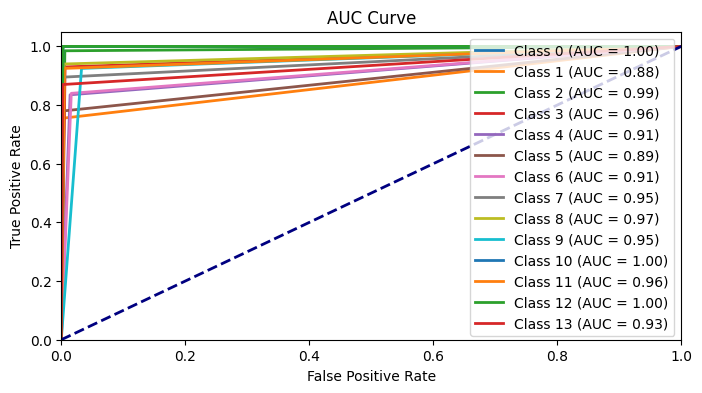

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
n_classes = len(class_names)
y_test_one_hot = label_binarize(y_test, classes=list(range(n_classes)))
y_pred_one_hot = label_binarize(y_pred_labels, classes=list(range(n_classes)))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc='best')
plt.show()

88/88 [==============================] - 3s 34ms/step


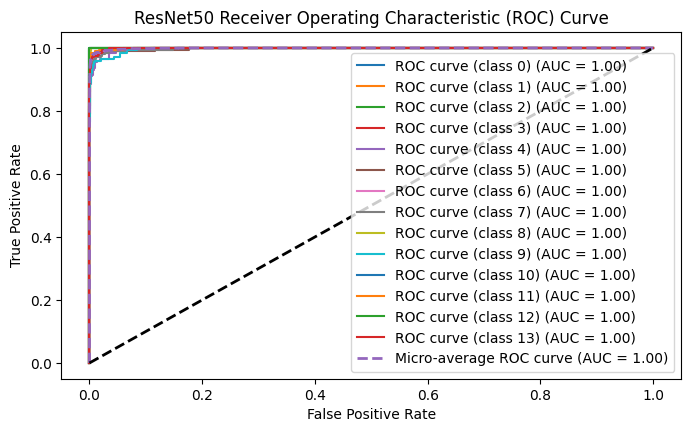

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
y_pred_prob_bin = y_pred_prob  # assuming model output is already probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 4.5))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet50 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


88/88 [==============================] - 3s 33ms/step


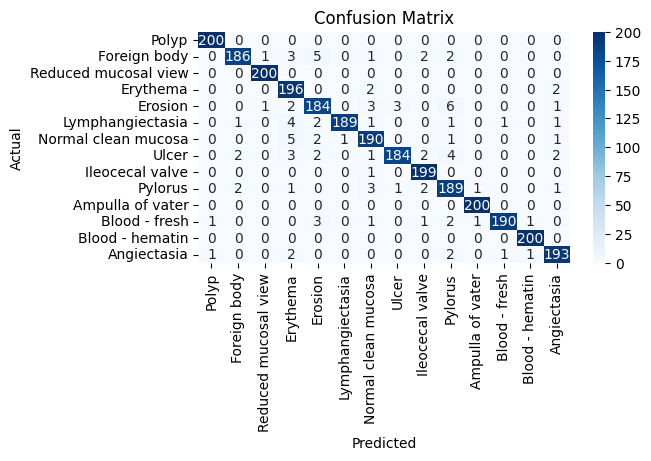

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

# Convert probability predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Replace this line with your actual prediction process
y_pred = model.predict(X_test)

from tensorflow.keras.utils import to_categorical

#  y_train and y_test are your label arrays
y_train_one_hot = to_categorical(y_train, num_classes=len(class_names))
y_test_one_hot = to_categorical(y_test, num_classes=len(class_names))

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_labels, y_pred_labels, average=None)

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")
    print(f"  F1-Score: {f1_score[i]:.2f}")
    print()


88/88 [==============================] - 3s 33ms/step
Class: Polyp
  Precision: 0.99
  Recall: 1.00
  F1-Score: 1.00

Class: Foreign body
  Precision: 0.97
  Recall: 0.93
  F1-Score: 0.95

Class: Reduced mucosal view
  Precision: 0.99
  Recall: 1.00
  F1-Score: 1.00

Class: Erythema
  Precision: 0.91
  Recall: 0.98
  F1-Score: 0.94

Class: Erosion
  Precision: 0.93
  Recall: 0.92
  F1-Score: 0.92

Class: Lymphangiectasia
  Precision: 0.99
  Recall: 0.94
  F1-Score: 0.97

Class: Normal clean mucosa
  Precision: 0.94
  Recall: 0.95
  F1-Score: 0.94

Class: Ulcer
  Precision: 0.98
  Recall: 0.92
  F1-Score: 0.95

Class: Ileocecal valve
  Precision: 0.97
  Recall: 0.99
  F1-Score: 0.98

Class: Pylorus
  Precision: 0.91
  Recall: 0.94
  F1-Score: 0.93

Class: Ampulla of vater
  Precision: 0.99
  Recall: 1.00
  F1-Score: 1.00

Class: Blood - fresh
  Precision: 0.99
  Recall: 0.95
  F1-Score: 0.97

Class: Blood - hematin
  Precision: 0.99
  Recall: 1.00
  F1-Score: 1.00

Class: Angiectasia
  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert one-hot encoded labels to class labels
from tensorflow.keras.utils import to_categorical

#  y_train and y_test are your label arrays
y_train_one_hot = to_categorical(y_train, num_classes=len(class_names))
y_test_one_hot = to_categorical(y_test, num_classes=len(class_names))

# Convert probability predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f"Precision (Weighted): {precision:.4f}")

# Calculate recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print(f"Recall (Weighted): {recall:.4f}")

Accuracy: 0.9643
Precision (Weighted): 0.9649
Recall (Weighted): 0.9643
